In [1]:
import cv2 as cv
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  
import shutil
import numpy as np
import tensorflow as tf
import core.utils as utils
from core.config import cfg
from core.yolov3 import YOLOV3
import glob
from evaluate_all import YOLOTest
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_image(img_path):
    if(isinstance(img_path, str)):
        return cv.imread(img_path)
    else:
        return None

def image_show(img):
    """显示图片"""
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')

In [3]:
# 路径
images_dir = "./data/images/"

# 图像信息
width = 2048
height = 2448


In [4]:
# 读图像
images_path = glob.glob(images_dir + "*.??g")
print("number of images:%s" % len(images_path))

origin_image = cv.imread(images_path[10])

number of images:3


IndexError: list index out of range

In [ ]:
class YOLOShow():
    def __init__(self):
        self.yolo = YOLOTest()
    
    def imshow_detect(self, image):
        bboxes_pr = self.predict(image)
        image = utils.draw_bbox(image, bboxes_pr, show_label=False)
        image_show(image)
    
    def predict(self, image):
        return self.yolo.predict(image)

yolo = YOLOShow()

In [ ]:
# 显示
origin_image = cv.imread(images_path[20])
yolo.imshow_detect(origin_image)

In [ ]:
image = cv.imread(images_path[0])
bboxes = yolo.predict(image)
for i, bbox in enumerate(bboxes):
    print(i, bbox)

In [ ]:
def prase_bbox_info(bboxes):
    """
        解析bbox数据为点集（整形）
        
        input:
            bboxes: [x_min, y_min, x_max, y_max, probability, cls_id] format coordinates.
        
        return:
            (x,y),(left_up_point, right_bottom_point)
    """
#     def get_rect_corner_point(bbox):
#         """
#             必须按顺序
#         """
#         x, y, w, h = int(bbox[0]), int(bbox[1]), bbox[2], bbox[3]
#         w_2, h_2 = w//2, h//2
#         print(x,y, w,h)
#         return [(x,y), [(x - w_2, y - h_2), (x + w_2, y - h_2),(x + w_2, y + h_2),(x - w_2, y + h_2)]]
    def get_rect_corner_point(bbox):
        x_min, y_min = bbox[0], bbox[1]
        x_max, y_max = bbox[2], bbox[3]
        center_x = (x_min + x_max) // 2
        center_y = (y_min + y_max) // 2
        return [(center_x, center_y), [(x_min, y_min), (x_max, y_max)]]
    
    rect_bbox = []
    for bbox in bboxes:
        rect_bbox.append(get_rect_corner_point(bbox))
    
    return rect_bbox

In [ ]:
# 截取区域并显示
def clip_roi(image, rect_corner):
    """
        
    """
    # 左上角和右下角点
    x_min, y_min = rect_corner[0]
    x_max, y_max = rect_corner[1]

    # 输入判断
    if(x_min < 0 or y_min < 0 \
      or x_max > width or y_max > height):
        raise ValueError("rectangular corner was out of compass.")
    else:
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
        print("xmin:", x_min, " ymin:", y_min," xmax:", x_max," ymax:", y_max)
    

    return image[y_min:y_max,x_min:x_max]

In [ ]:
# 获得图像和bbox
image = cv.imread(images_path[0])
bboxes = yolo.predict(image)
xy, bbox = prase_bbox_info(bboxes)[0]

(1073.0, 992.0) (2048, 2448, 3)


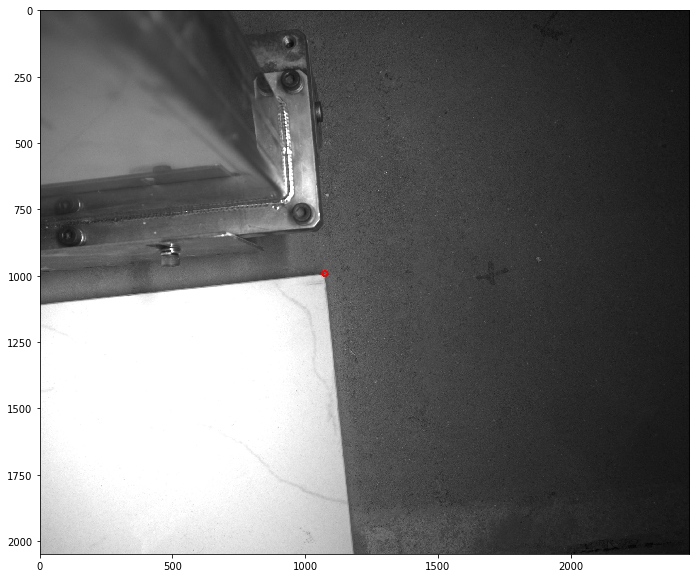

In [27]:
def draw_corner(image, corner_point):
    im = cv.circle(image,(int(corner_point[0]),int(corner_point[1])),10,(255,0,0),5)
    image_show(im)

[(1030.0653076171875, 948.168701171875), (1117.558837890625, 1037.2891845703125)]
xmin: 1030  ymin: 948  xmax: 1117  ymax: 1037
<class 'numpy.ndarray'> (89, 87, 3)


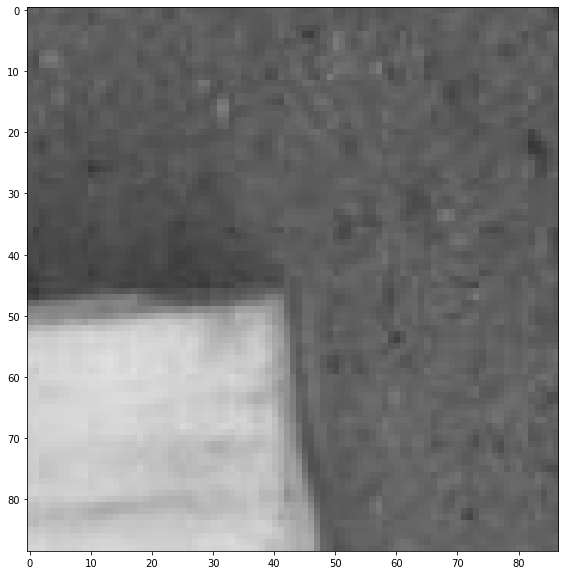

In [34]:
# 获得区域
rects = prase_bbox_info(bboxes)

# 显示区域
for center, rect in rects:
    roi_image = clip_roi(image, rect)
    print("roi shape: ", roi_image.shape)
    image_show(roi_image)

uint8


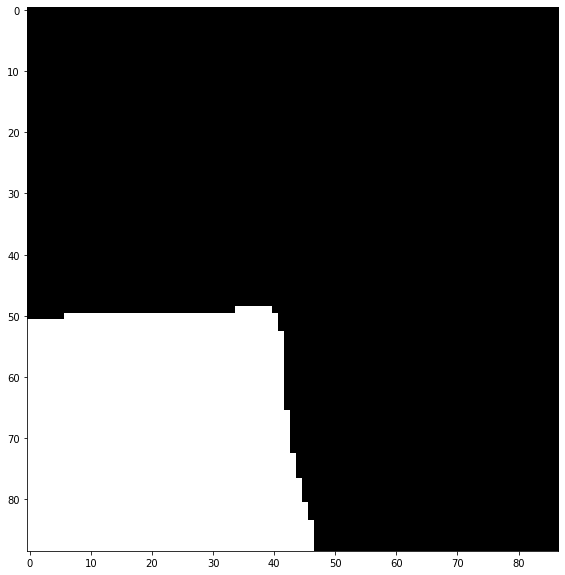

In [42]:
blur = cv.GaussianBlur(roi_image,(5,5),0)
print(blur.dtype)
grayimg = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
ret2,th2 = cv.threshold(grayimg,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
image_show(th2)

In [ ]:
# canny寻找边缘


In [ ]:
# 加载模板

# 创建多个旋转模板

# 匹配，获取最大的矩形框

# 计算旋转框

In [ ]:
bbox = yolo.predict(image)
